In [14]:
# Import necessary libraries and modules
import sys
sys.path.append("ACC_PROJECT")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from fastai.tabular.all import *
from fastbook import cluster_columns
from dtreeviz.trees import *

# Import custom functions
from functions.model_evaluator import (
    evaluation,
) 
from functions.value_encoding import DataEncoder


# Load the dataset and select relevant columns
df = pd.read_csv("processed_data.csv", low_memory=False)
df.drop(columns="description", inplace=True)


# Check for GPU availability and set the device accordingly
device = "cuda" if t.cuda.is_available() else "cpu"


In [15]:
# Splitting the dataset into training and validation sets with stratification
df_wo_valid, df_valid = train_test_split(
    df, test_size=0.05, random_state=1, stratify=df.label
)
df_wo_valid = df_wo_valid.reset_index()
df_wo_valid.drop(columns="index", inplace=True)
df_valid = df_wo_valid.reset_index()
df_valid.drop(columns="index", inplace=True)


In [18]:
# Encoding categorical data for model training
encoder = DataEncoder(df)  # Initialize with the entire dataset
encoded_training = encoder.transform(df_wo_valid)
encoded_validation = encoder.transform(df_valid)



c:\Users\jsult\miniconda3\envs\nilusproject\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [20]:
encoded_training

,account_Chase 8900,account_Comerica 0697,account_Comerica 0796,account_Comerica 1018,account_Comerica 1703,account_Comerica 8127,account_Wells Fargo 5709,account_Wells Fargo 7878,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,bank_Chase,bank_Comerica,bank_Wells,amount,direction_encoded,label
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.427358,1,Payroll
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.625366,1,LSP cash payout
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7.373933,1,Financing
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.484907,1,LSP Reimbursements Receivable
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.706613,0,Financing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7.288566,0,Financing
1617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.094345,1,LSP Reimbursements Receivable
1618,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.889212,1,Financing
1619,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.902169,1,LSP cash payout


In [21]:
# Splitting the encoded training data into training and test sets
X_train, X_test, y_train, y_test = encoder.split_data(
    encoded_training, test_size=0.2, random_state=2
)


In [24]:
# Displaying the shapes of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1296, 18), (325, 18), (1296,), (325,))

In [25]:
X_train

,account_Chase 8900,account_Comerica 0697,account_Comerica 0796,account_Comerica 1018,account_Comerica 1703,account_Comerica 8127,account_Wells Fargo 5709,account_Wells Fargo 7878,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,bank_Chase,bank_Comerica,bank_Wells,amount,direction_encoded
801,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.442651,1
1197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.355812,1
395,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.158044,1
1048,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.114926,1
287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.692529,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.509428,1
910,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.853351,1
1294,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.995732,1
1466,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.388371,1


decision tree prediction 0.8984615384615384


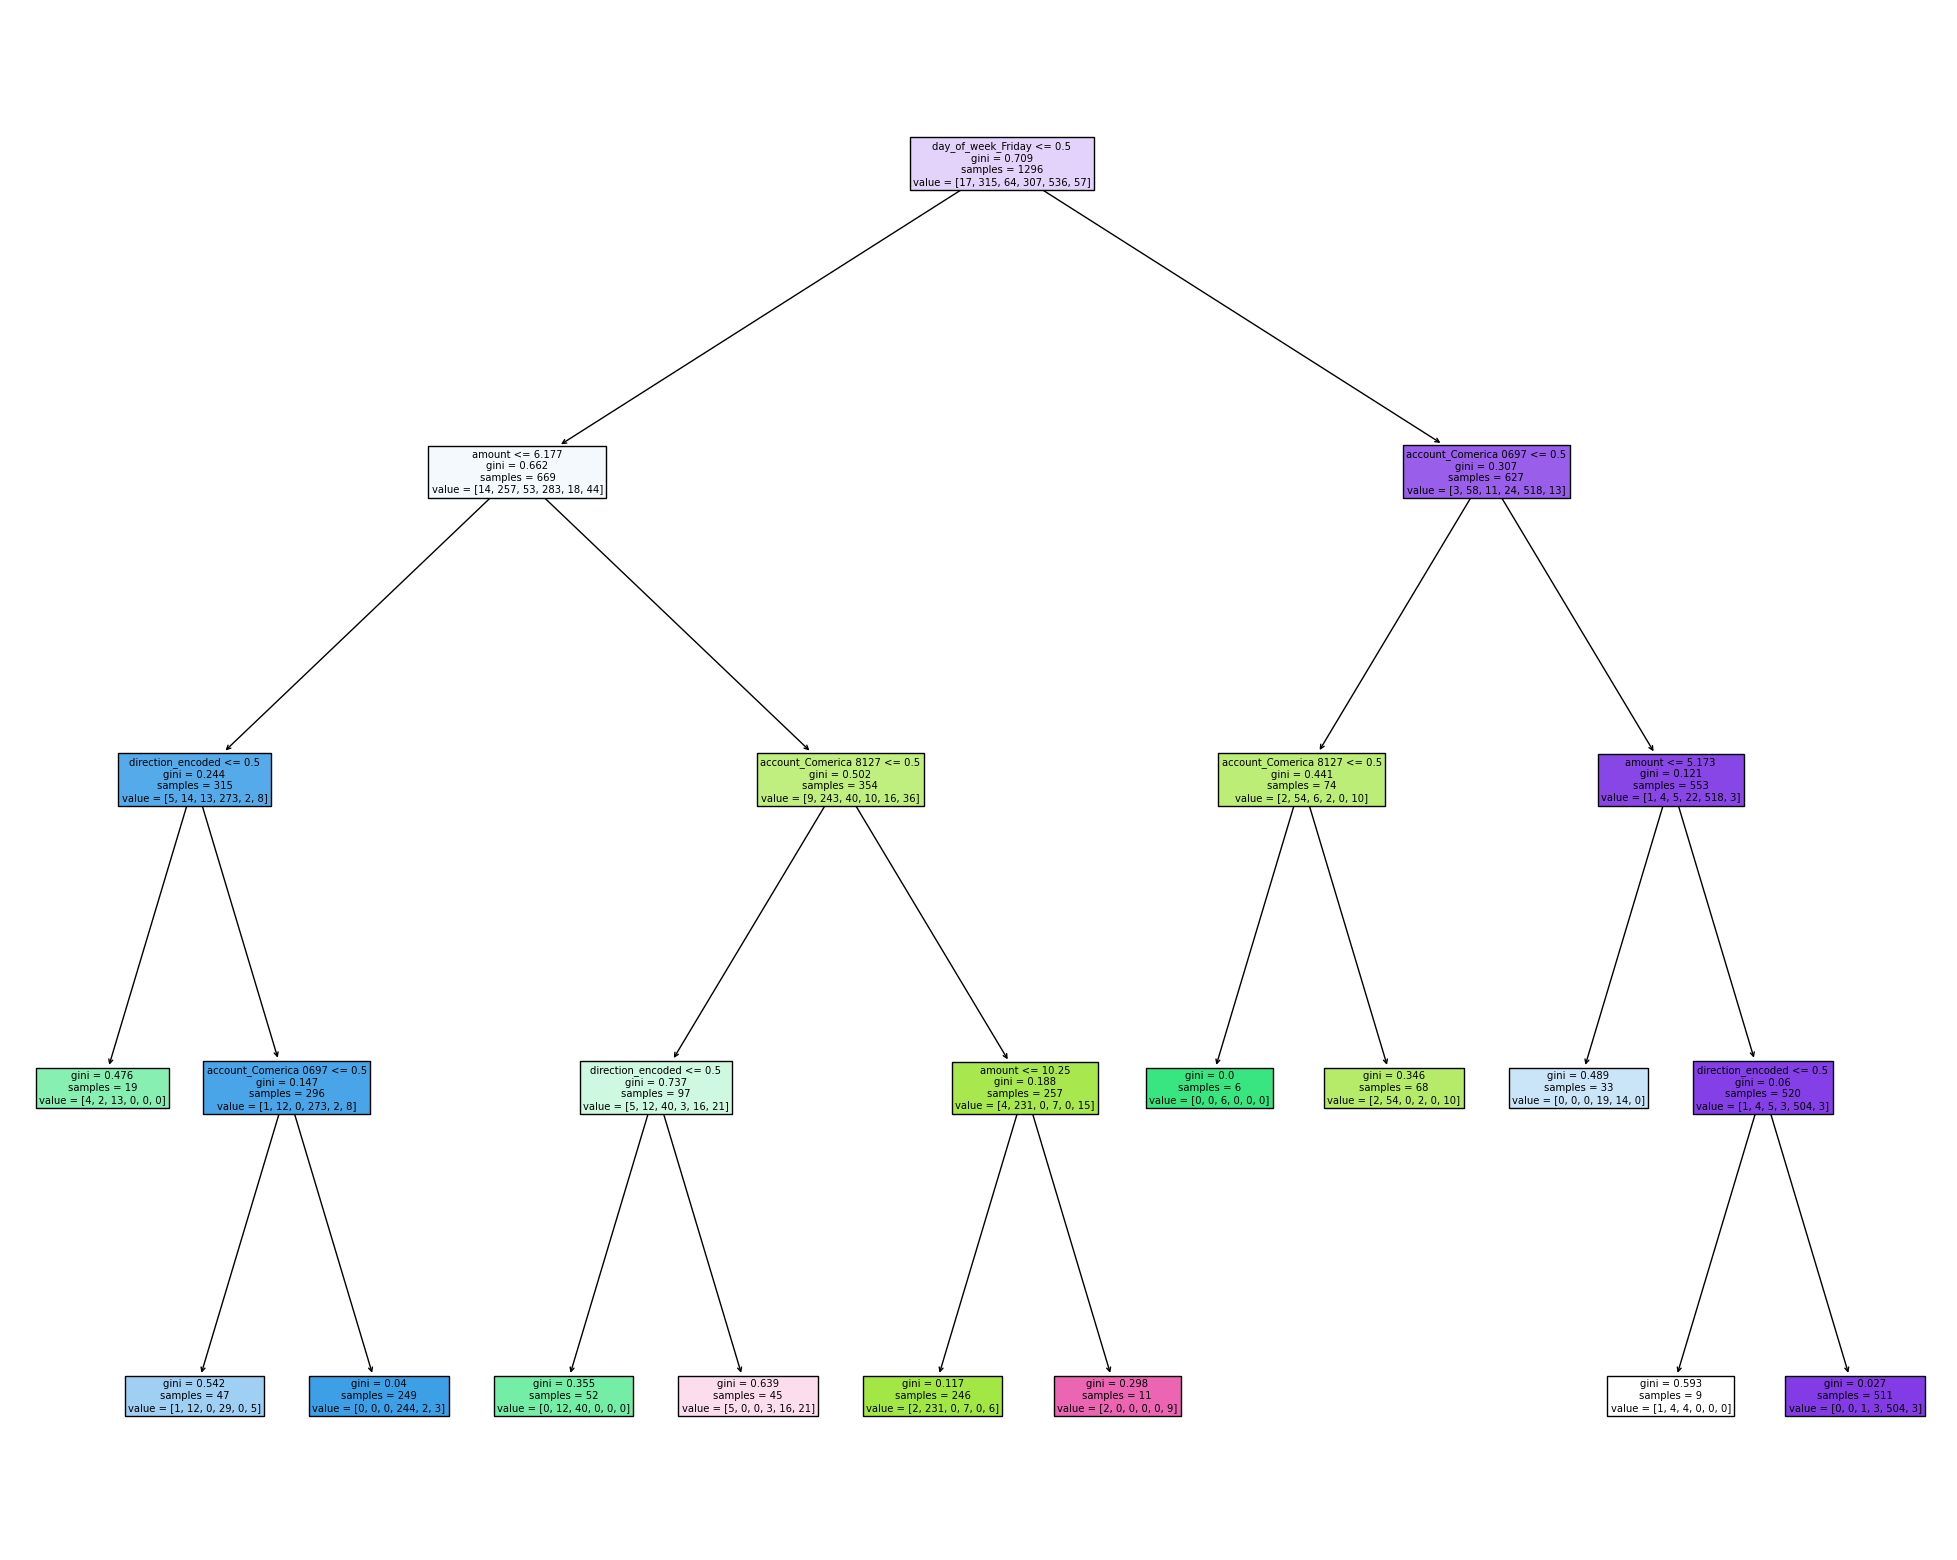

In [26]:
# Training a Decision Tree Classifier
m = DecisionTreeClassifier(max_leaf_nodes=12)
m.fit(X_train, y_train)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(m, feature_names=X_train.columns, filled=True)

# Printing the accuracy of the Decision Tree prediction
print("decision tree prediction", (m.predict(X_test) == y_test).sum() / len(y_test))


In [27]:
# Function to calculate feature importance for Random Forest
def rf_feat_importance(m, df):
    return pd.DataFrame(
        {"cols": df.columns, "imp": m.feature_importances_}
    ).sort_values("imp", ascending=False)


fi = rf_feat_importance(m, X_train)
fi[:10]


,cols,imp
8,day_of_week_Friday,0.385734
16,amount,0.303398
1,account_Comerica 0697,0.137073
5,account_Comerica 8127,0.091182
17,direction_encoded,0.082612
11,day_of_week_Tuesday,0.000000
15,bank_Wells,0.000000
14,bank_Comerica,0.000000
13,bank_Chase,0.000000
12,day_of_week_Wednesday,0.000000


In [30]:
# Function to perform grid search for optimal hyperparameters
def optimal_param_search(model, param_grid):
    grid_search = GridSearchCV(
        model,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2,
    )
    grid_search.fit(X_train, y_train)

    optimal_params = grid_search.best_params_
    print("Best Score = ", grid_search.best_score_)
    print("Optimal Parameters:", optimal_params)
    return optimal_params


Logistic Regression


In [31]:
param_grid_lr = {"C": [0.1, 1, 10, 100], "max_iter": [100, 1000, 10000]}

optimal_params_lr = optimal_param_search(LogisticRegression(), param_grid_lr)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Score =  0.9074071874071874
Optimal Parameters: {'C': 1, 'max_iter': 100}


c:\Users\jsult\miniconda3\envs\nilusproject\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [11]:
lr_optimal = LogisticRegression(**optimal_params_lr)
lr_optimal.fit(X_train, y_train)
evaluation(lr_optimal, X_test, y_test)


Accuracy = 0.8984615384615384
Precision = 0.8967504083378705
Recall = 0.8984615384615384
F1 Score = 0.8769461021632967
Confusion Matrix:
[[  0   3   0   0   1   0]
 [  0  72   7   0   0   0]
 [  0   0  16   0   0   0]
 [  0   1   0  71   5   0]
 [  0   0   0   2 132   0]
 [  0  10   0   4   0   1]]


KNN

In [16]:
# Parameter grid for KNN
param_grid_knn = {
    "n_neighbors": [3, 5, 11, 19],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

optimal_params_knn = optimal_param_search(KNeighborsClassifier(), param_grid_knn)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score =  0.9062271062271063
Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [17]:
# Retraining Gradient Boosting Machine
knn_optimal = KNeighborsClassifier(**optimal_params_knn)
knn_optimal.fit(X_train, y_train)
evaluation(knn_optimal, X_test, y_test)


Accuracy = 0.8947368421052632
Precision = 0.8954065464609535
Recall = 0.8947368421052632
F1 Score = 0.8912228360668465
Confusion Matrix:
[[  1   2   0   1   0   0]
 [  0  77   4   2   0   0]
 [  0   1  13   1   2   0]
 [  0   2   0  75   3   1]
 [  0   0   0   8 132   2]
 [  0   5   0   1   1   8]]


SVM

In [20]:
# Parameter grid for SVM
param_grid_svm = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf", "poly", "sigmoid"],
}
optimal_params_svm = optimal_param_search(SVC(), param_grid_svm)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Score =  0.9157509157509158
Optimal Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [22]:

svm_optimal = SVC(**optimal_params_svm)
svm_optimal.fit(X_train, y_train)
evaluation(svm_optimal,X_test,y_test)

Accuracy = 0.8918128654970761
Precision = 0.881573411440247
Recall = 0.8918128654970761
F1 Score = 0.8826125433347527
Confusion Matrix:
[[  0   3   0   1   0   0]
 [  0  77   5   1   0   0]
 [  0   2  13   1   1   0]
 [  0   3   0  73   5   0]
 [  0   0   0   5 136   1]
 [  0   5   0   2   2   6]]


Decision Tree

In [12]:
# Parameter grid for Decision Tree
param_grid_dt = {
    "max_depth": [5, 10, 20, 30, None],
    "min_samples_split": [2, 5, 10, 20, 40],
    "min_samples_leaf": [1, 2, 4, 8],
}
optimal_params_dt = optimal_param_search(DecisionTreeClassifier(), param_grid_dt)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score =  0.9112622512622511
Optimal Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [13]:
dt_optimal = DecisionTreeClassifier(**optimal_params_dt)
dt_optimal.fit(X_train, y_train)
evaluation(dt_optimal, X_test, y_test)


Accuracy = 0.9076923076923077
Precision = 0.906013986013986
Recall = 0.9076923076923077
F1 Score = 0.9047441087926918
Confusion Matrix:
[[  1   2   0   0   0   1]
 [  1  71   5   1   0   1]
 [  0   1  15   0   0   0]
 [  0   1   1  71   4   0]
 [  0   0   1   1 130   2]
 [  0   4   0   4   0   7]]


Random Forest


In [26]:
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"],
}

optimal_params_rf = optimal_param_search(RandomForestClassifier(), param_grid_rf)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Score =  0.9172161172161172
Optimal Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [27]:

rf_optimal = RandomForestClassifier(**optimal_params_rf)
rf_optimal.fit(X_train, y_train)
evaluation(rf_optimal,X_test,y_test)

Accuracy = 0.9152046783625731
Precision = 0.9163741191095762
Recall = 0.9152046783625731
F1 Score = 0.9100426360031322
Confusion Matrix:
[[  1   2   0   1   0   0]
 [  0  78   4   1   0   0]
 [  0   1  15   0   1   0]
 [  0   2   0  76   3   0]
 [  0   0   0   5 136   1]
 [  0   5   0   1   2   7]]


GBM

In [30]:
# Defining the hyperparameter grid for Gradient Boosting Machine
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

optimal_params_gbm = optimal_param_search(GradientBoostingClassifier(), param_grid_gbm )



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Score =  0.917948717948718
Optimal Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


In [48]:
gbm_optimal = GradientBoostingClassifier(**optimal_params_gbm)
gbm_optimal.fit(X_train, y_train)
evaluation(gbm_optimal,X_test,y_test)

Accuracy = 0.9138461538461539
Precision = 0.9136272654221371
Recall = 0.9138461538461539
F1 Score = 0.9082198240532768
Confusion Matrix:
[[  1   2   0   0   1   0]
 [  0  70   6   2   0   1]
 [  0   0  16   0   0   0]
 [  0   1   0  73   2   1]
 [  0   0   0   2 131   1]
 [  0   5   0   4   0   6]]


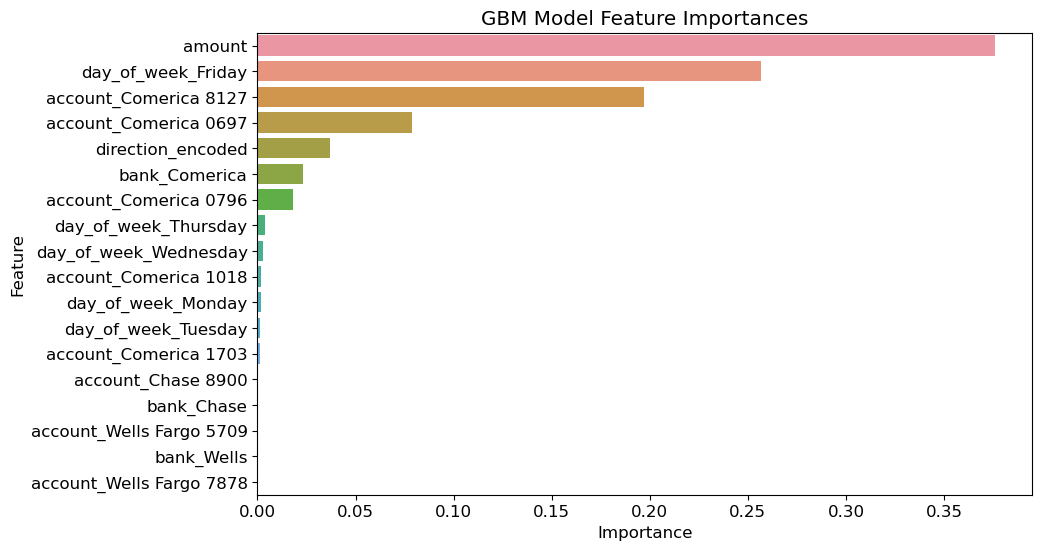

In [38]:
# Extracting feature importance from the GBM model
feature_importance = gbm_optimal.feature_importances_
features = X_train.columns

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": features, "Importance": feature_importance}
)

# Sorting the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("GBM Model Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [48]:
def analyze_confidence_threshold(model, X_test, y_test, probabilities, threshold):
    # Initialize counters
    correct_above_threshold = 0
    correct_below_threshold = 0
    incorrect_above_threshold = 0
    incorrect_below_threshold = 0

    # Loop over all instances in the test set
    for i in range(len(X_test)):
        # Get the predicted class and the maximum probability (confidence)
        predicted_class = model.classes_[np.argmax(probabilities[i])]
        max_probability = max(probabilities[i])

        # Check if the prediction is correct
        is_correct = predicted_class == y_test.iloc[i]

        # Increment counters based on confidence and correctness
        if max_probability >= threshold:
            if is_correct:
                correct_above_threshold += 1
            else:
                incorrect_above_threshold += 1
        else:
            if is_correct:
                correct_below_threshold += 1
            else:
                incorrect_below_threshold += 1

    return (
        correct_above_threshold,
        correct_below_threshold,
        incorrect_above_threshold,
        incorrect_below_threshold,
    )


# Set a confidence threshold (for example, 70%)
threshold = 0.8

# Analyze for GBM model
results_gbm = analyze_confidence_threshold(
    gbm_optimal, X_test, y_test, probabilities_gbm, threshold
)

# Print results
print(
    "GBM Results (Correct Above, Correct Below, Incorrect Above, Incorrect Below):",
    results_gbm,
)


NameError: name 'gbm_optimal' is not defined